# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
Our first step is to download the relevant packages that we need for this project. 

Next, we prepare our data for analysis by ensuring our data is consistent across columns and follows the data structures specified in Practical Exam paper. 

Firstly, I identified that the "web_browser" column has 150 missing values, which were replaced with the string "unknown". 

Secondly, the "value_for_money" column contains "/10" at the end of each observation. I standardised this column by using the "removesuffix" method on this column so that each value is between 1 and 10 and in integer format. 

Thirdly, I changed the datatype of the column "reviewer_age" to integer and replaced missing values with the average age (which I rounded up to 33 years). 

Finally, I used the lstrip method on the "review_month" column to remove any strings or other characters to ensure that each month was in the same format (Jan for January, Feb for February etc). Our data is now ready for Exploratory Analysis.


In [21]:
#Final Exam Prep: Step 1 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np

Bike = pd.read_csv('electric_bike_ratings_2212.csv')

#Fix 1: web_browser has 150 missing values, replace with "unknown"
Bike['web_browser'] = Bike['web_browser'].fillna("unknown")
Bike.head()



,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [22]:
#Fix 2: Issues with the value_for_money column, change values to 'integer' between 1 and 10 (drop /10)
Bike['value_for_money'] = Bike['value_for_money'].str.removesuffix('/10')
Bike['value_for_money'] = Bike['value_for_money'].astype('int')

In [23]:
#Fix 3:  Change reviewer_age datatype to integer, replace missing values with the average age (33)
Bike['reviewer_age'] = Bike['reviewer_age'].replace("-", "33")
Bike['reviewer_age'] = Bike['reviewer_age'].astype('int')
Bike.head(32)

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5,12.29
5,0,Lunna-Eyden,26-Aug,IE,47,Commuting,5,15.28
6,0,Lunna-Keetra,01-Mar,Chrome,20,Leisure,3,12.28
7,1,Nielah-Keetra,15-Mar,Chrome,32,Commuting,7,15.92
8,1,Nielah-Eyden,09-Mar,Chrome,35,Commuting,4,19.39
9,1,Nielah-Eyden,Jul,Firefox,22,Commuting,6,18.38


In [24]:
#Fix 4: fix review_month to a common format
Bike['review_month'] = Bike['review_month'].str.lstrip('0123456789-')
Bike['review_month'].head(10)

0    Oct
1    Jun
2    Oct
3    Nov
4    Sep
5    Aug
6    Mar
7    Mar
8    Mar
9    Jul
Name: review_month, dtype: object

**Task 2** 

[Text(0, 0, '890'), Text(0, 0, '610')]

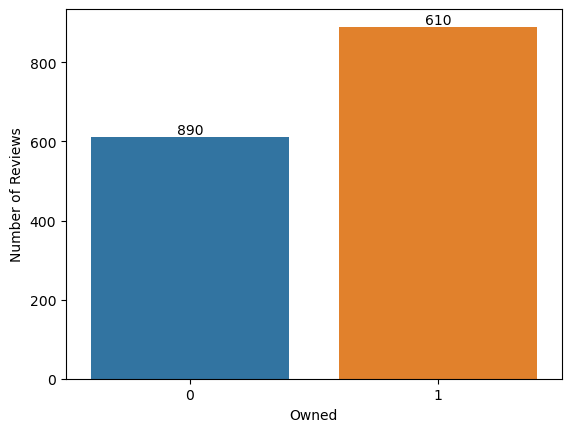

In [25]:
#(Create a visualization that shows how many reviews were from owners and how many were not owners)
ax = sns.countplot(x=Bike["owned"])
ax.set_xlabel("Owned")
ax.set_ylabel("Number of Reviews")
abs_values = Bike['owned'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Looking at the countplot above we can clearly see that the reviews given by owners i.e. where Owned=1, are much higher than those given by non-owners, with 890 reviews from owners and only 610 from non-owners. The observations are not balanced across categories as owned=1 (owners) has 280 more observations than owned=0.

## Task 3

[Text(0.5, 1.0, 'Graph 2: Overall Rating vs Primary Use by Ownership')]

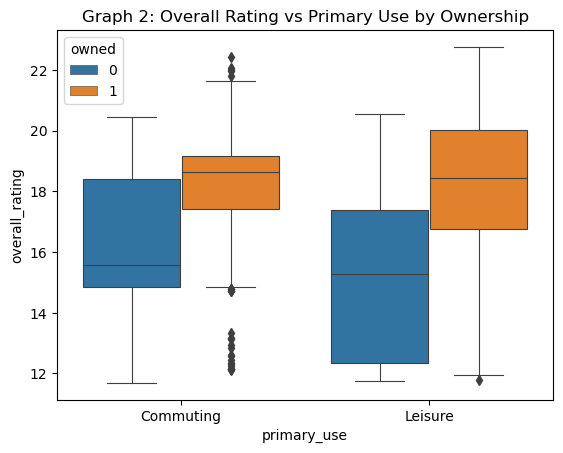

In [10]:
sns.boxplot(data=Bike, y='overall_rating', x='primary_use',linewidth=0.8, hue='owned').set(title="Graph 2: Overall Rating vs Primary Use by Ownership")

First, we produce a boxplot to look at the overall rating of a review compared to the primary use of the bike (for leisure or commuting) and seperate by ownership. Looking at graph 2, we can see that that the spread of values for those observations that are owners and primarily use their bike for commuting is much greater than the other boxplots, with many outlier values falling outside of our "minimum" and "maximum" values at either end of the boxplot. Looking at the IQR and 50th percentile (mean) of each boxplot in Graph 2, we can also see that the average overall ratings are higher from owners than non owners (by primary use).

[Text(0.5, 1.0, 'Graph 3 Overall Rating vs Web Browser by Ownership')]

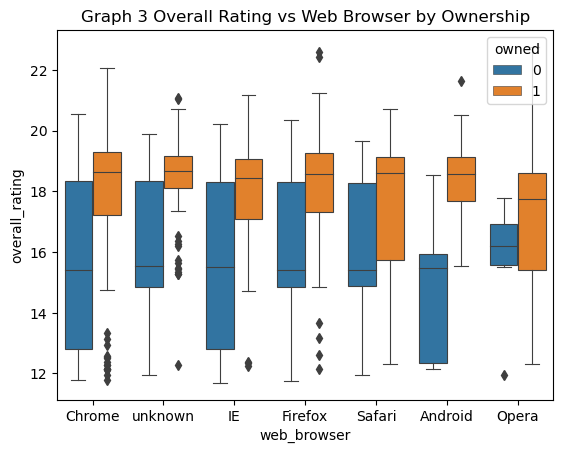

In [11]:
sns.boxplot(data=Bike, y='overall_rating', x='web_browser', linewidth=0.8, hue='owned').set(title="Graph 3 Overall Rating vs Web Browser by Ownership")

Next, we look at the distribution of Overall Ratings vs  Web Browser by Ownership in Graph 3. Looking at the boxplots again we can see that when we group owners and non-owners by browser the average overall rating is higher for owners than non-owners across web browsers, holding all else equal.

And we see a simiilar pattern when looking at the distribution of overall ratings vs their model by ownership:; owners tend to give higher overall ratings on average than non-owners across bike models. We also observe more outliers and a greater spread of observations amongst owners than non-owners.

[Text(0.5, 1.0, 'Graph 4 Overall Rating vs Make Model by Ownership')]

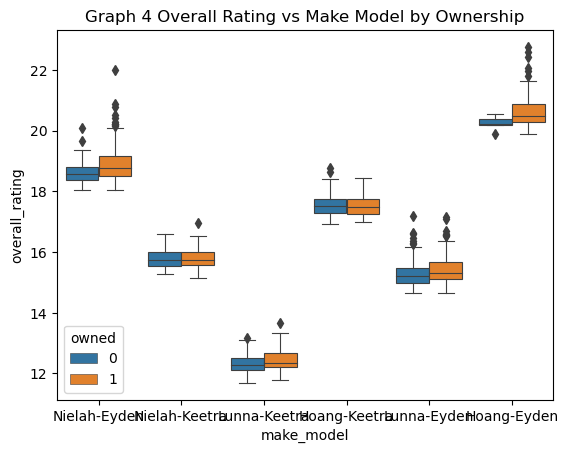

In [12]:
sns.boxplot(data=Bike, y='overall_rating', x='make_model', linewidth=0.8, hue='owned').set(title="Graph 4 Overall Rating vs Make Model by Ownership")

[Text(0.5, 1.0, 'Graph 8 Overall Rating vs Value for Money by Ownership')]

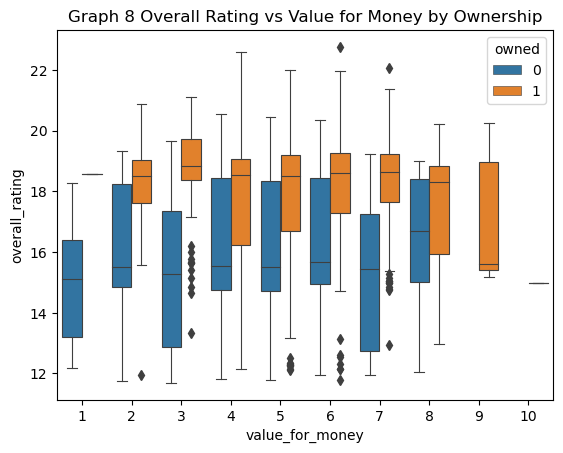

In [13]:
sns.boxplot(data=Bike, y='overall_rating', x='value_for_money', linewidth=0.8, hue='owned').set(title='Graph 8 Overall Rating vs Value for Money by Ownership')

Bike.describe()

## Task 4

In Task 4 we look at the relationship between ownership and overall rating: In Graph 2, we have a boxplot of the distribution of overall rating by ownership. 

We can see that the distribution of overall ratings by owners (owned = 1) shows a clustering of outliers under the "minimum" value of our boxplot, and a smaller clustering of outliers above the "maximum" value of our boxplot. 

Additionally to this, we can see that the IQR of the owned boxplot is more concentrated than the distribution of values for the non-owned boxplot, which also doesn't feature any outliers. Additionally I produced a scatterplot with ownership on the Y-axis and overall_rating on the X-axis to further visualise this relationship.

[Text(0.5, 1.0, 'Graph 2 Distribution of Overall Rating by Ownership')]

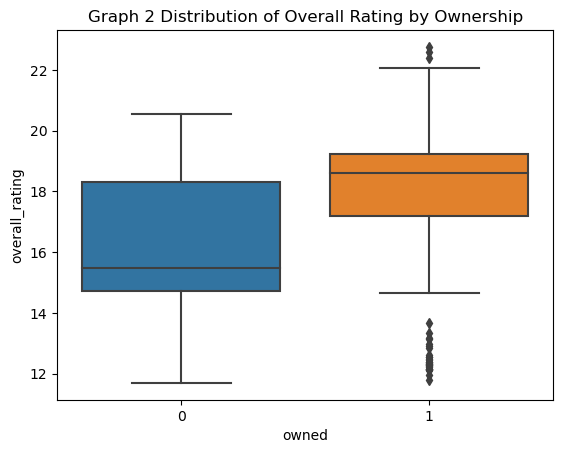

In [14]:
sns.boxplot(data=Bike, y='overall_rating', x='owned').set(title='Graph 2 Distribution of Overall Rating by Ownership')

We also produce a scatterplot to demonstrate the relationship between overall rating and ownership:

<Axes: xlabel='overall_rating', ylabel='owned'>

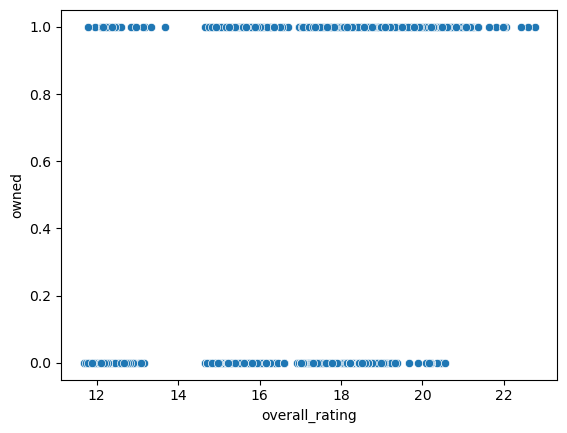

In [15]:
sns.scatterplot(data=Bike, x="overall_rating", y="owned")

## Task 5


This is a classification problem; we want to know whether we can predict whether the rating came from a person who owns the bike (owned = 1) or from someone who doesn't own the bike(owned = 0). To answer this problem, we'll first use a binomial logistic regression and as a comparison model we'll use a decision tree classifier second to compare the performance of our first model to that of our second model.



## Task 6
Fit a baseline model to predict whether a review came from an owner or not using the
data provided. You must include your code.

In [16]:
#Preprocessing/Prepare modelling, import ML models and peformance metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
features = Bike.drop(columns='owned')
X = pd.get_dummies(features, columns=['make_model','review_month','web_browser','reviewer_age','primary_use','value_for_money', 'overall_rating'])
Bike['owned'] = Bike['owned'].replace({True:1,False:0})
y = Bike['owned'] 

In [17]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [18]:
#Method 1: Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log =logreg.predict(X_test)

## Task 7
Fit a comparison model to predict whether a review came from an owner or not using
the data provided. You must include your code.

In [19]:
#Method 2: Create Decision Tree classifer object; comparison model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

## Task 8
Explain why you chose the two models used in parts 6 and 7.


As stated in Task 5, this problem is a classification problem. to solve his problem, we will use a binomial logistic regression, since we only have two binary outcomes from our regression (whether the reviewer owns the bike or not). 

Additionally we will use a Decision Tree classifier as this is a common model for classification problems. a Decision Tree Classifier is made up of a series of sequential decision that lead up to along braches to a specific result. In our example, it would be a case of going through various decision trees to decide whether to classify the reviewer as a "owner" or "non-owner". The decision treee classifier model will also allow us to evaulate the performance of our logsitic regression model against this model. Our last motivation for choosing this model is that the coefficients of accuracy from our classification reports can be easily compared to compare overall model accuracy. 

## Task 9
Compare the performance of the two models used in parts 6 and 7, using any method
suitable for the type of model. You must include your code.

Using the coefficients in the precision row, which measures the proportion of positive identifications that our model correctly identified,
in this case how many times our model correctly whether the review came from an owner (owned=1) or a non-owner (owned=0). 

We focus on the weighted average due to the class imbalances in our datatset identified in Step 2, with our test dataset (20% of our total dataset) consisting of 300 
observations 129 of which are from non-owners and 171 are from owners.

Our logistic regression has  a weighted average precision score of 0.74, meaning that our model 
correctly predicts the ownership status of a reviewer 74% of the time. 

In contrast, our alternative model, the Decision Tree Classifier model, only has a weighted precision score of 0.67, 
meaning that this modle only predict ownership status of a reviewer correctly 67% of the time.

In [20]:
#Method 1: Evaulating Logistic Regression Model
print(classification_report(y_test, y_pred_log))

#Method 2: Evaluating Decision Tree classifer model
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66       129
           1       0.74      0.84      0.78       171

    accuracy                           0.74       300
   macro avg       0.74      0.72      0.72       300
weighted avg       0.74      0.74      0.73       300

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       129
           1       0.70      0.75      0.73       171

    accuracy                           0.68       300
   macro avg       0.67      0.66      0.67       300
weighted avg       0.67      0.68      0.67       300



## Task 10
Explain which model performs better and why.


We focus on the weighted average due to the class imbalances in our datatset identified in Step 2, with our test dataset (20% of our total dataset) consisting of 300 
observations 129 of which are from non-owners and 171 are from owners.

Our logistic regression has  a weighted average precision score of 0.74, meaning that our model 
correctly predicts the ownership status of a reviewer 74% of the time. 

In contrast, our alternative model, the Decision Tree Classifier model, only has a weighted precision score of 0.67, 
meaning that this modle only predict ownership status of a reviewer correctly 67% of the time.

Basedo on our analysis of the two models, it is clear that our logistic regression performs better and more accurately correctly predicts the ownership status of a reviewer (74%) than our Decision Tree classifier model 67%)